In [85]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

In [86]:
# update the velocity of the particules
def update_velocity(particles, velocity, pbest, gbest, vmax):
    
    r1 = np.random.uniform(0, 1) # choose randomly r1 between 0 and 1
    r2 = np.random.uniform(0, 1)
    inertia = w * velocity # the inertia term 
    cognitive = c1 * r1 * (pbest - particles) # the term of individual exploration
    social = c2 * r2 * (gbest - particles) # the term of global search
    new_velocity = inertia + cognitive + social # it adds up to give the new velocity 

    idx = np.where(new_velocity > vmax) # take all the velocities greater than the clamping velocity 
    new_velocity[idx] = vmax # fix the large velocities to vmax
    idx = np.where(new_velocity < -vmax) # likewise but for negative velocities
    new_velocity[idx] = -vmax

    return new_velocity


In [87]:
def update_position(particles, velocity):
    
    new_particles = particles + velocity # moving the particles
    idx = np.where(new_particles > x_sup) # take the particles that do not satisfy the constraint 
    new_particles[idx] = x_sup # block the particle at the upper-bound
    idx = np.where(new_particles < x_inf) # same for the lower bound
    new_particles[idx] = x_inf

    return new_particles 


In [101]:
def update_best_prox(pbest, gbest, particles):
    obj = function(particles) # compute the new objectives
    gbest_prox = np.array([function(p)+((p-gbest)**2)/(2*lam) for p in particles])
    if gbest_prox.min() < function(gbest): # if a new best global is reached we take it
        gbest = particles[np.argmin(gbest_prox)]

    idx = np.where(obj < function(pbest)) # we update the personal bests 
    pbest[idx] = particles[idx]
    return pbest, gbest


In [89]:
def update_best(pbest, gbest, particles):
    obj = function(particles) # compute the new objectives
    if obj.min() < function(gbest): # if a new best global is reached we take it
        gbest = particles[np.argmin(obj)]

    idx = np.where(obj < function(pbest)) # we update the personal bests 
    pbest[idx] = particles[idx]
    return pbest, gbest

In [90]:

def run_pso(N, T, c1, c2, w, k, x_inf, x_sup, function):

    vmax = k*(x_sup - x_inf)/2 # The clamping velocity 
    

    # Initialization

    particles = np.random.uniform(x_inf, x_sup, N) # take randomly N initial particles 
    velocity = np.zeros_like(particles) # set the velocities to zeo at the beginning 
    pbest = np.copy(particles) # the personal bests position are the initial positions 
    gbest = pbest[np.argmin(function(pbest))]# the global best is the minimum of pbest at t = 0
    minimizer = []
    dynamic = [np.copy(particles)] # we store the trajectory of the particles 

    for _ in range(T): # we loop T times to have a dynamic of T periods 

    
        velocity = update_velocity(particles, velocity, pbest, gbest, vmax) # compute the velocity 
        particles = update_position(particles, velocity) # new particles 
        dynamic.append(np.copy(particles)) # store the new population 
        pbest, gbest = update_best(pbest, gbest, particles) # update the best postions 
        minimizer.append(gbest)

    return minimizer, dynamic # return the best position and the trajectory 


In [91]:

def run_pso_prox(N, T, c1, c2, w, k, x_inf, x_sup, function):

    vmax = k*(x_sup - x_inf)/2 # The clamping velocity 
    

    # Initialization

    particles = np.random.uniform(x_inf, x_sup, N) # take randomly N initial particles 
    velocity = np.zeros_like(particles) # set the velocities to zeo at the beginning 
    pbest = np.copy(particles) # the personal bests position are the initial positions 
    gbest = pbest[np.argmin(function(pbest))]# the global best is the minimum of pbest at t = 0
    minimizer = []
    dynamic = [np.copy(particles)] # we store the trajectory of the particles 

    for _ in range(T): # we loop T times to have a dynamic of T periods 

    
        velocity = update_velocity(particles, velocity, pbest, gbest, vmax) # compute the velocity 
        particles = update_position(particles, velocity) # new particles 
        dynamic.append(np.copy(particles)) # store the new population 
        pbest, gbest = update_best_prox(pbest, gbest, particles) # update the best postions 
        minimizer.append(gbest)

    return minimizer, dynamic # return the best position and the trajectory 



In [132]:
def ackley(x):
    return -20*np.exp(-0.2*np.sqrt(x**2)) - np.exp(0.5*np.cos(2*np.pi*x))+ 20 + np.exp(1)

def alpine(x):
    return np.abs(x*np.sin(x)+0.1*x)

In [147]:
c1, c2, w, k = 1.9, 1, 0.9, 0.5 # to compute the velocity 
T = 30 # Time 
N = 20 # Number of particles 
x_inf = -10 # upper bound
x_sup = 10 # lower bound
lam = 10

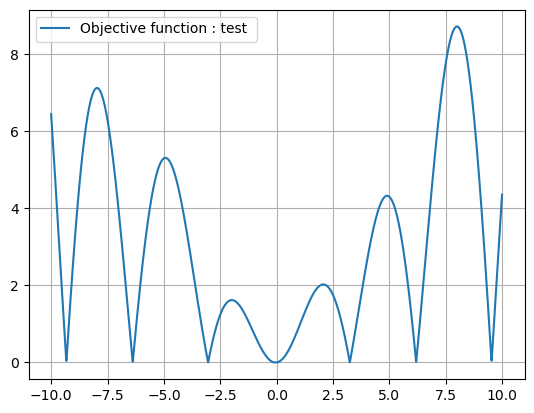

In [148]:
x1 = np.arange(-10, 10, 0.01)
plt.plot(x1, alpine(x1), label = 'Objective function : test ')
plt.legend()
plt.grid()
plt.show()

In [149]:
S = []
for T in range(10, 50):
    L = [run_pso_prox(N, T, c1, c2, w, k, x_inf, x_sup, alpine)[0][-1]**2 for _ in range(50) ]
    S.append(sum(L)/len(L))   
    

In [150]:
M = []
for T in range(10, 50):
    L = [run_pso(N, T, c1, c2, w, k, x_inf, x_sup, alpine)[0][-1]**2 for _ in range(50) ]
    M.append(sum(L)/len(L))  

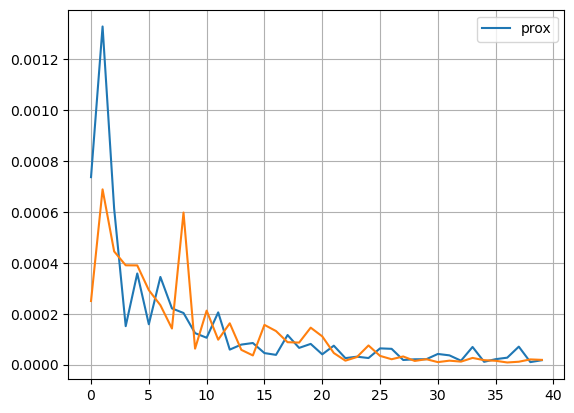

In [151]:
plt.plot(S, label = 'prox')
plt.plot(M)
plt.legend()
plt.grid()
plt.show()